# 공 튀기기 게임을 만들어 보자

### 웹/파이선 프로그래밍 term-project 2015101394 추성현

#### 1) 
우선, 저는 이번 학기에 처음으로 코딩을 접했기 때문에, 고차원 적인 게임을 만들기에는 다소 무리가 있다고 판단했습니다. 이전에 파이썬으로 만든 간단한 게임들을 본 경험이 있었는데, 그 당시 기억에 남았던게 공을 활용한 게임이었습니다. 

이에 저는 자료를 찾아본 결과, 스티브 잡스가 이전에 만들었던 '벽돌 깨기' 게임이 눈에 들어오게 되었습니다. 따라서 저는 공 튀기기 게임 중 '벽돌 깨기' 게임을 만들어 볼 예정입니다.

#### 2) 
저는 현재 소프트웨어융합학과 복수전공하고 있습니다. 또한 저는 예전부터 게임을 좋아하고 게임에 흥미가 많았습니다. 데이터사이언스트랙을 전공하고 있어 앞으로 데이터 관련된 프로젝트는 수도 없이 진행하겠지만, 게임을 만드는 프로젝트는 거의 없을 것 같다는 생각이 들었습니다. 따라서 게임 관련된 프로젝트도 한 번쯤은 진행해보고 싶어서 이번 주제를 선정하게 되었습니다.

#### 3) 
Python을 활용해 제작할 수 있는 간단한 게임들에 대한 내용들은 github, youtube 및 다양한 사이트들에 방대한 자료들이 존재합니다. 이번 학기에 처음 프로그래밍을 배우는지라, 그 오픈소스들에 활용된 코드들의 사용법을 익히는 것 역시 주요 목표 중 하나로 잡을 예정입니다. 또한 주어진 다양한 오픈소스들을 배합하여 응용할 수 있는 방안도 고민해 볼 예정입니다. 

#### 4) 
공 튀기기 게임을 만들 때 사용한 코드들을 뜯어보니 대부분은 tkinter 혹은 pygame 이라는 라이브러리를 사용한 것으로 보입니다. 그 외 다른 라이브러리나 방식같은 경우는 개발자들마다 달랐는데, 저는 이 중 tkinter 라이브러리를 활용해 게임을 만들어 보고자합니다.

tkinter는 기본적으로 GUI 프로그래밍을 할 때 사용하는 모듈입니다. 타 GUI 프레임워크나 툴킷에 비해 지원되는 위젯들이 부족하지만, 기본적으로 내장되어있는 파이썬 표준 라이브러리이기 때문에 쉽고 간단한 GUI 프로그램을 만들 수 있다고 판단하여 이를 활용해 프로젝트를 진행하게 되었습니다.


#### tkinter 프로그래밍 순서
1. tkinter 라이브러리를 사용하기 위해 메인 창인'tk 객체의 인스턴스'를 생성
2. GUI component(위젯) 생성 후 메인 창에 배치.
3. 메인 루프 실행 -> GUI화면 완성
4. 생성한 창에서 버튼을 누르는 등의 사용자 조작은 Event로 다루어지면, 각종 이벤트가 발생하면 미리 등록된 처리가 실행. 

#### tkinter 사용하기
1. tkinter 모듈 import
2. Tk 클래스 객체(root) 생성
3. 이 객체의 mainloop() method 호출
4. 빈 다이얼로그 표시


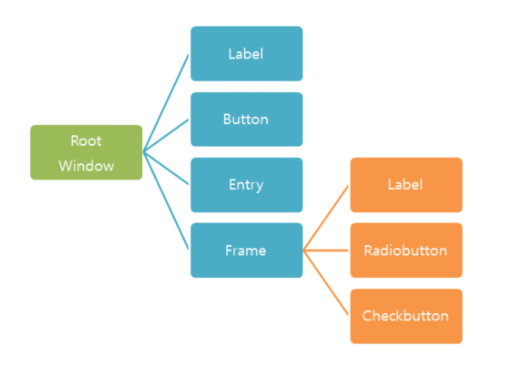

In [1]:
from IPython.display import Image

Image("./tkinter.PNG")

#### GUI 구현  

from tkinter import*: tkinter 라이브러리 import   

root = Tk(): 상위 레벨 윈도우 창 생성  

 윈도우이름(root): 다른이름 가능  
 
root.mainloop(): 윈도우 창을 윈도우가 종료될 때까지 실행  

title("제목"): 윈도우 창의 제목  
  
geometry("너비 x 높이 + x좌표 + y좌표")  

resizeable(상하, 좌우)  

 - 윈도우 창의 창 크기 조절 가능 여부  
 - True인 경우: 윈도우 창의 크기 조절가능  
 - True(1), False(0) 사용 가능  
 
wm_attributes("-topmost", 1): 최상위 창 설정하기  

Canvas: 선, 다각형, 원 등을 그리기 위한 캔버스 생성   

Label(윈도우창, parameter1, parameter2, parameter3,..): 라벨의 속성 설정  
  
  
#### Class 생성

1. 공(Ball) Class  

2. 사용자가 움직일 패들(paddle) Class  

3. 깰 블럭(Bricks) Class  



#### 5)  코드 구현 및 실행

In [5]:
from tkinter import *
import time
import random

root = Tk()
root.title("벽돌 깨기 게임")
root.geometry("500x570")
root.resizable(0, 0)
root.wm_attributes("-topmost", 1)
canvas = Canvas(root, width=500, height=500, bd=0, highlightthickness=0, highlightbackground="Red", bg="White")
canvas.pack(padx=10, pady=10)
score = Label(height=50, width=80, text="Score: 00", font="italic 14 bold")
score.pack(side="left")
root.update()


class Ball:
    def __init__(self, canvas, color, paddle, bricks, score):
        self.bricks = bricks
        self.canvas = canvas
        self.paddle = paddle
        self.score = score
        self.bottom_hit = False
        self.hit = 0
        self.id = canvas.create_oval(10, 10, 25, 25, fill=color, width=1)#공 그리기
        self.canvas.move(self.id, 230, 461) #공 위치하기
        start = [4, 3.8, 3.6, 3.4, 3.2, 3, 2.8, 2.6]
        random.shuffle(start)
        #print(start)
        self.x = start[0]
        self.y = -start[0]
        self.canvas.move(self.id, self.x, self.y)
        self.canvas_height = canvas.winfo_height()#캔버스의 현재 높이
        self.canvas_width = canvas.winfo_width()

    def brick_hit(self, pos):
        for brick_line in self.bricks:
            for brick in brick_line:
                brick_pos = self.canvas.coords(brick.id)
                #print(brick_pos)
                try:
                    if pos[2] >= brick_pos[0] and pos[0] <= brick_pos[2]:
                        if pos[3] >= brick_pos[1] and pos[1] <= brick_pos[3]:
                            canvas.bell()
                            self.hit += 1
                            self.score.configure(text="Score: " + str(self.hit))
                            self.canvas.delete(brick.id)
                            return True
                except:
                    continue
        return False
    
        
    def paddle_hit(self, pos):
        paddle_pos = self.canvas.coords(self.paddle.id)
        if pos[2] >= paddle_pos[0] and pos[0] <= paddle_pos[2]:
            if pos[3] >= paddle_pos[1] and pos[1] <= paddle_pos[3]:
                #print("paddle hit")
                return True
            return False

    def draw(self):
        self.canvas.move(self.id, self.x, self.y)
        pos = self.canvas.coords(self.id)
        #print(pos)
        start = [4, 3.8, 3.6, 3.4, 3.2, 3, 2.8, 2.6]
        random.shuffle(start)
        if self.brick_hit(pos):
            self.y = start[0]
        if pos[1] <= 0:
            self.y = start[0]
        if pos[3] >= self.canvas_height:
            self.bottom_hit = True
        if pos[0] <= 0:
            self.x = start[0]
        if pos[2] >= self.canvas_width:
            self.x = -start[0]
        if self.paddle_hit(pos):
            self.y = -start[0]

        
class Paddle:
    def __init__(self, canvas, color):
        self.canvas = canvas
        self.id = canvas.create_rectangle(0, 0, 100, 10, fill=color)
        self.canvas.move(self.id, 200, 485)
        self.x = 0
        self.pausec=0
        self.canvas_width = canvas.winfo_width()
        self.canvas.bind_all("<Left>", self.turn_left)
        self.canvas.bind_all("<Right>", self.turn_right)
        self.canvas.bind_all("<space>", self.pauser)
        

    def draw(self):
        pos = self.canvas.coords(self.id)
        #print(pos)
        if pos[0] + self.x <= 0:
            self.x = 0
        if pos[2] + self.x >= self.canvas_width:
            self.x = 0
        self.canvas.move(self.id, self.x, 0)

    def turn_left(self, event):
        self.x = -3.5

    def turn_right(self, event):
        self.x = 3.5

    def pauser(self,event):
        self.pausec+=1
        if self.pausec==2:
            self.pausec=0
    

class Bricks:
    def __init__(self, canvas, color):
        self.canvas = canvas
        self.id = canvas.create_oval(5, 5, 25, 25, fill=color, width=2)


playing = False


def start_game(event):
    global playing
    if playing is False:
        playing = True
        score.configure(text="Score: 00")
        canvas.delete("all")
        BALL_COLOR = ["red", "yellow", "white"]
        BRICK_COLOR = ["PeachPuff3", "dark slate gray", "rosy brown", "light goldenrod yellow", "turquoise3", "salmon",
                       "light steel blue", "dark khaki", "pale violet red", "orchid", "tan", "MistyRose2",
                       "DodgerBlue4", "wheat2", "RosyBrown2", "bisque3", "DarkSeaGreen1"]
        random.shuffle(BALL_COLOR)
        paddle = Paddle(canvas, "black")
        bricks = []
        for i in range(0, 5):
            b = []
            for j in range(0, 19):
                random.shuffle(BRICK_COLOR)
                tmp = Bricks(canvas, BRICK_COLOR[0])
                b.append(tmp)
            bricks.append(b)

        for i in range(0, 5):
            for j in range(0, 19):
                canvas.move(bricks[i][j].id, 25 * j, 25 * i)

        ball = Ball(canvas, BALL_COLOR[0], paddle, bricks, score)
        root.update_idletasks()
        root.update()

        time.sleep(1)
        while 1:
            if paddle.pausec !=1:
                try:
                    canvas.delete(m)
                    del m
                except:
                    pass
                if not ball.bottom_hit:
                    ball.draw()
                    paddle.draw()
                    root.update_idletasks()
                    root.update()
                    time.sleep(0.01)
                    if ball.hit==95:
                        canvas.create_text(250, 250, text="승리!!", fill="yellow", font="italic 36 ")
                        root.update_idletasks()
                        root.update()
                        playing = False
                        break
                else:
                    canvas.create_text(250, 250, text="실패ㅠ", fill="red", font="italic 36 ")
                    root.update_idletasks()
                    root.update()
                    playing = False
                    break
            else:
                try:
                    if m==None:pass
                except:
                    m=canvas.create_text(250, 250, text="일시 정지", fill="green", font="italic 36 ")
                root.update_idletasks()
                root.update()


root.bind_all("<Return>", start_game)
canvas.create_text(250, 250, text="시작하려면 Enter를 누르시오", fill="red", font="italic 18")
j=canvas.find_all()
root.mainloop()



#### 6)  

코드를 구성한 순서는 아래와 같습니다.

1. 프레임 생성  
2. 공(Ball)class 생성  
3. 공 움직이게 만들기
4. 지속적으로 공이 반사되게 만들기
5. 패들(Paddle) class 생성
6. 패들 움직이기
7. 벽돌(Brick) class 생성  
8. 게임의 구조 형성  
  8-1. Score 구현  
  8-2. Brick 14개 * 5줄 = 95개 모두 깨면 **"성공!!"** 출력  
  8-3. 중간에 Ball을 떨어뜨리면 **"실패ㅠ"** 출력  
  8-4. 일시정지 구현 
9. 실행
  
  
#### 결론
게임은 정상적으로 실행이 잘 되었습니다. 오픈소스는 정말 다양하게 찾아볼 수 있었고, 다양한 오픈소스들을 뜯어보며 많은 공부를 할 수 있었습니다. 코드의 구성은 다양한 오픈소스 중 가장 간단하게 짜여진 코드를 찾아, 그 코드에 살을 붙여가는 식으로 진행했습니다. 

#### 7)  

a) 공 움직임 + 패들 구현 참조 코드
http://www.poly-ed.com/source-code/python-brickbreaker-with-tkinter/

b) 게임의 구조 참조(score, brick 등) http://tychodevalk.nl/python/?file=breakout

c) 직접 구현한 부분  

- 벽돌 구현(특이점을 주기 위해 일반적인 직사각형 모양이 아닌 구체로 제작, 공 만들때 썼던 코드 참조)
- 설정값(수치) 및 전반적인 함수 수정
- score 표시
- 전반적인 UI
- 단순한 반복 작업(공을 튀게만 만드는 코드)에서 구체적인 게임으로 구현  

추가 코드는 아래와 같습니다(추가 코드 외 참조 오픈 소스들도 코드 수정 작업 거침).

In [4]:
class Bricks:
    def __init__(self, canvas, color):
        self.canvas = canvas
        self.id = canvas.create_oval(5, 5, 25, 25, fill=color, width=2)

In [ ]:
def start_game(event):
    global playing
    if playing is False:
        playing = True
        score.configure(text="Score: 00")
        canvas.delete("all")
        BALL_COLOR = ["red", "yellow", "white"]
        BRICK_COLOR = ["PeachPuff3", "dark slate gray", "rosy brown", "light goldenrod yellow", "turquoise3", "salmon",
                       "light steel blue", "dark khaki", "pale violet red", "orchid", "tan", "MistyRose2",
                       "DodgerBlue4", "wheat2", "RosyBrown2", "bisque3", "DarkSeaGreen1"]
        random.shuffle(BALL_COLOR)
        paddle = Paddle(canvas, "blue")
        bricks = []
        for i in range(0, 5):
            b = []
            for j in range(0, 19):
                random.shuffle(BRICK_COLOR)
                tmp = Bricks(canvas, BRICK_COLOR[0])
                b.append(tmp)
            bricks.append(b)

        for i in range(0, 5):
            for j in range(0, 19):
                canvas.move(bricks[i][j].id, 25 * j, 25 * i)

        ball = Ball(canvas, BALL_COLOR[0], paddle, bricks, score)
        root.update_idletasks()
        root.update()

        time.sleep(1)
        while 1:
            if paddle.pausec !=1:
                try:
                    canvas.delete(m)
                    del m
                except:
                    pass
                if not ball.bottom_hit:
                    ball.draw()
                    paddle.draw()
                    root.update_idletasks()
                    root.update()
                    time.sleep(0.01)
                    if ball.hit==95:
                        canvas.create_text(250, 250, text="승리!!", fill="yellow", font="italic 36 ")
                        root.update_idletasks()
                        root.update()
                        playing = False
                        break
                else:
                    canvas.create_text(250, 250, text="실패ㅠ", fill="red", font="italic 36 ")
                    root.update_idletasks()
                    root.update()
                    playing = False
                    break
            else:
                try:
                    if m==None:pass
                except:
                    m=canvas.create_text(250, 250, text="일시 정지", fill="green", font="italic 36 ")
                root.update_idletasks()
                root.update()

#### 8) 참조한 사이트

https://alegruz.imweb.me/blog/?q=YToyOntzOjEyOiJrZXl3b3JkX3R5cGUiO3M6MzoiYWxsIjtzOjc6ImtleXdvcmQiO3M6Njoi67K964%2BMIjt9&bmode=view&idx=222450&t=board

https://m.blog.naver.com/isaac7263/221582704012

https://www.hackster.io/trivediswap25/make-your-own-brickbreaker-using-python-28c674

http://andrewbusch-bvsd.weebly.com/breakout.html

https://necromuralist.github.io/posts/breakout-with-tkinter/